In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

### Creating DataFrames to Use

In [4]:
training_data = pd.read_parquet("../Databases/cf_train.parquet/part-00003-f5f99d61-97a3-408a-9dcd-5d6fc378fff2-c000.snappy.parquet")

In [5]:
map_track_index_id = {}
for track_id_index,track_id in zip(training_data['track_id_index'],training_data['track_id']):
    map_track_index_id[track_id_index] = track_id

In [6]:
from pathlib import Path
import pandas as pd

data_dir = Path('../Databases/itemFactors_5_12_130am.parquet-20210512T212320Z-001/itemFactors_5_12_130am.parquet')
item_factors_df = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('*.parquet')
)

In [7]:
item_factors_df.head()

,id,features
0,0,"[-0.069474705, 0.4626529, -0.11687545, -0.7458..."
1,10,"[-0.19217631, 0.33361778, -0.6735579, -0.31199..."
2,20,"[-0.05328676, 0.44249037, -0.18045868, -0.1672..."
3,30,"[-0.15235876, 0.35179976, 0.64976025, -0.63035..."
4,40,"[-0.15211484, 0.38842732, -0.17080618, -0.2903..."


In [8]:
import sqlite3

# Create a SQL connection to our SQLite database
con = sqlite3.connect("../Databases/track_metadata.db")

metadata_df = pd.read_sql_query("SELECT * FROM songs", con)

In [9]:
item_factors_df['id'] = item_factors_df['id'].apply(lambda x: map_track_index_id[x])

In [4]:
df_embedded = pd.read_csv("TSNE_Embed_FULL_FINAL.csv")

### Creating Tags DataFrame

In [6]:
import sqlite3

# Create a SQL connection to our SQLite database
con_lastfm = sqlite3.connect("../Databases/lastfm_tags.db")

cur = con_lastfm.cursor()

# The result of a "cursor.execute" can be iterated over by row
for row in cur.execute('SELECT * FROM sqlite_master WHERE type="table";'):
    print(row)

cur.execute('SELECT * FROM sqlite_master WHERE type="table";').fetchall()

('table', 'tags', 'tags', 2, 'CREATE TABLE tags (tag TEXT)')
('table', 'tids', 'tids', 3, 'CREATE TABLE tids (tid TEXT)')
('table', 'tid_tag', 'tid_tag', 4, 'CREATE TABLE tid_tag (tid INT, tag INT, val FLOAT)')


[('table', 'tags', 'tags', 2, 'CREATE TABLE tags (tag TEXT)'),
 ('table', 'tids', 'tids', 3, 'CREATE TABLE tids (tid TEXT)'),
 ('table',
  'tid_tag',
  'tid_tag',
  4,
  'CREATE TABLE tid_tag (tid INT, tag INT, val FLOAT)')]

In [7]:
tid_df = pd.read_sql_query("SELECT * FROM tids;", con_lastfm)

In [8]:
tag_df = pd.read_sql_query("SELECT * FROM tags;", con_lastfm)

In [9]:
tid_tag_df = pd.read_sql_query("SELECT * FROM tid_tag;", con_lastfm)

In [10]:
map_idx_tid = {}
for i in range(len(tid_df)):
    map_idx_tid[i + 1] = tid_df['tid'][i]

In [11]:
map_idx_tag = {}
for i in range(len(tag_df)):
    map_idx_tag[i + 1] = tag_df['tag'][i]

In [12]:
tid_tag_df['tid'] = tid_tag_df['tid'].apply(lambda x: map_idx_tid[x])

In [13]:
tid_tag_df['tag'] = tid_tag_df['tag'].apply(lambda x: map_idx_tag[x])

In [14]:
tid_tag_count_df = pd.DataFrame(tid_tag_df['tag'].value_counts())

## Let us now visualize 3 distinct genres / tags

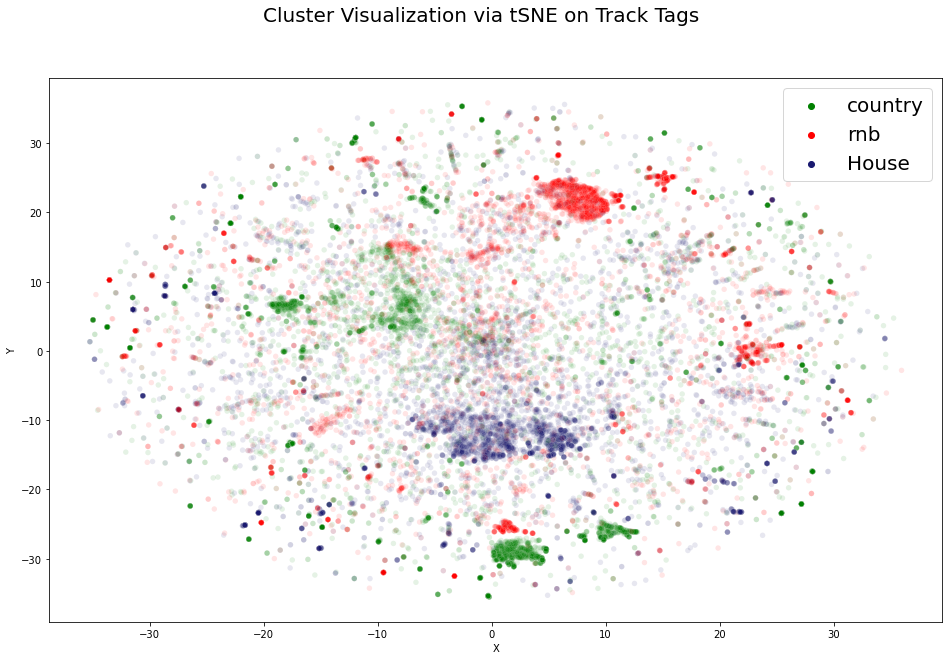

In [124]:
tid_tag_random_sample_df = tid_tag_df.loc[(tid_tag_df['tag']== 'country') |(tid_tag_df['tag']== 'House')| (tid_tag_df['tag']== 'rnb')]
tid_tag_Random_sample_group_FIRST_tid_df = tid_tag_random_sample_df.groupby(['tid'])['tag'].first().reset_index()
tags_FIRST_Random_sample_item_factors_df = df_embedded.merge(tid_tag_Random_sample_group_FIRST_tid_df,how='inner',left_on=['tid'],right_on=['tid'])
fig = plt.figure(figsize=(16,10))
fig.suptitle("Cluster Visualization via tSNE on Track Tags", fontsize=20)
sns.scatterplot(
    x="X", y="Y",
    hue="tag",
    data=tags_FIRST_Random_sample_item_factors_df,
    legend="full",
    alpha=0.1,
    s = 30,
    palette = ['green', 'red', 'midnightblue']
)
plt.legend(prop={'size': 20})
#plt.title("Clustering via tSNE on track tags")